Takes input data from startups.

Calculates projected revenue.

Evaluates unit economics.

Determines investment viability.

Replace ```startup_data``` with actual startup form responses.


In [1]:
!pip install openpyxl
import pandas as pd
import numpy as np
from google.colab import files

# Function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_revenue, end_revenue, years):
    return ((end_revenue / start_revenue) ** (1 / years)) - 1

# Function to evaluate unit economics
def evaluate_unit_economics(cac, ltv, gross_margin):
    ltv_to_cac_ratio = ltv / cac if cac > 0 else 0
    return {
        'LTV_to_CAC_Ratio': ltv_to_cac_ratio,
        'Healthy_Unit_Economics': ltv_to_cac_ratio > 3 and gross_margin > 0.4
    }

# Function to assess investment potential
def assess_startup(data):
    tam = data['TAM']
    sam = data['SAM']
    som = data['SOM']
    monthly_revenue = data['Monthly_Revenue']
    growth_rate = data['Expected_Growth_Rate'] / 100
    years = 5

    # Projected revenue in 5 years
    projected_revenue = monthly_revenue * ((1 + growth_rate) ** (years * 12))
    cagr = calculate_cagr(monthly_revenue, projected_revenue, years)

    # Evaluate unit economics
    unit_econ = evaluate_unit_economics(data['CAC'], data['LTV'], data['Gross_Margin'])

    # Create a report
    report = {
        'Projected_Revenue_5_Years': projected_revenue,
        'CAGR': cagr,
        'LTV_to_CAC_Ratio': unit_econ['LTV_to_CAC_Ratio'],
        'Healthy_Unit_Economics': unit_econ['Healthy_Unit_Economics'],
        'Investment_Viability': 'Good' if unit_econ['Healthy_Unit_Economics'] and cagr > 0.2 else 'Risky'
    }
    return report

# Read startup data from Excel
def read_excel_data(file_path):
    df = pd.read_excel(file_path)
    return df.to_dict(orient='records')

# Write results back to Excel
def write_results_to_excel(results, output_file):
    df = pd.DataFrame(results)
    df.to_excel(output_file, index=False)

# Run analysis
input_file = "startup_data.xlsx"  # This is the uploaded file
output_file = "startup_results.xlsx"

# Read data
startup_list = read_excel_data(input_file)

# Process data
results = [assess_startup(startup) for startup in startup_list]

# Save results to Excel
write_results_to_excel(results, output_file)

# Download the output file
files.download(output_file)  # This will let you download the results
print("Analysis complete! Click the link above to download results.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analysis complete! Click the link above to download results.


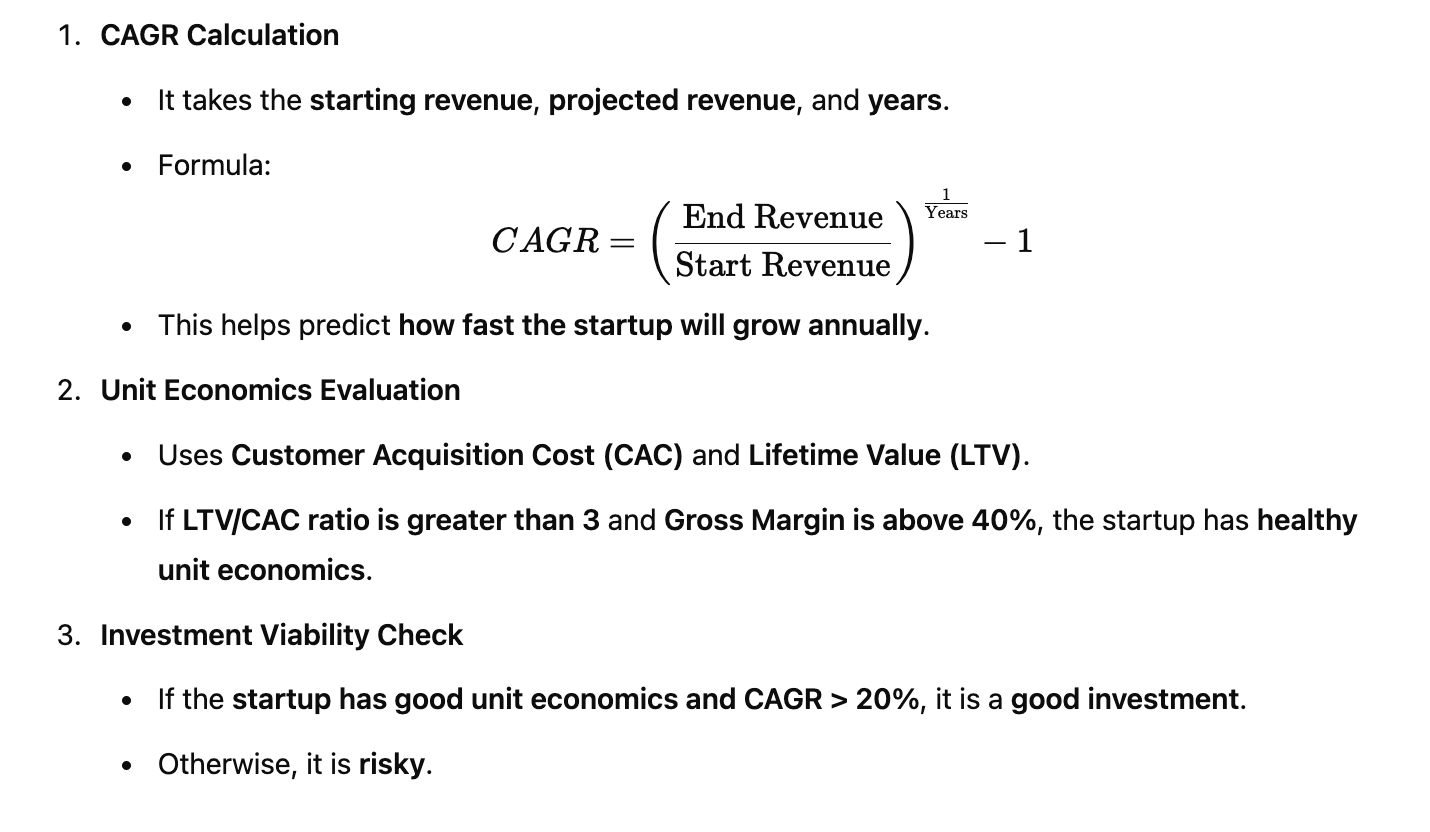